In [12]:
import os
import pickle
import numpy as np
import matplotlib.pyplot as plt
import re

['test_results_episode_401.pkl', 'test_results_episode_801.pkl', 'test_results_episode_1201.pkl', 'test_results_episode_1601.pkl', 'test_results_episode_2001.pkl', 'test_results_episode_2401.pkl', 'test_results_episode_2801.pkl', 'test_results_episode_3201.pkl', 'test_results_episode_3601.pkl', 'test_results_episode_4000.pkl']
['test_results_episode_401.pkl', 'test_results_episode_801.pkl', 'test_results_episode_1201.pkl', 'test_results_episode_1601.pkl', 'test_results_episode_2001.pkl', 'test_results_episode_2401.pkl', 'test_results_episode_2801.pkl', 'test_results_episode_3201.pkl', 'test_results_episode_3601.pkl', 'test_results_episode_4000.pkl']
['test_results_episode_401.pkl', 'test_results_episode_801.pkl', 'test_results_episode_1201.pkl', 'test_results_episode_1601.pkl', 'test_results_episode_2001.pkl', 'test_results_episode_2401.pkl', 'test_results_episode_2801.pkl', 'test_results_episode_3201.pkl', 'test_results_episode_3601.pkl', 'test_results_episode_4000.pkl']
['test_result

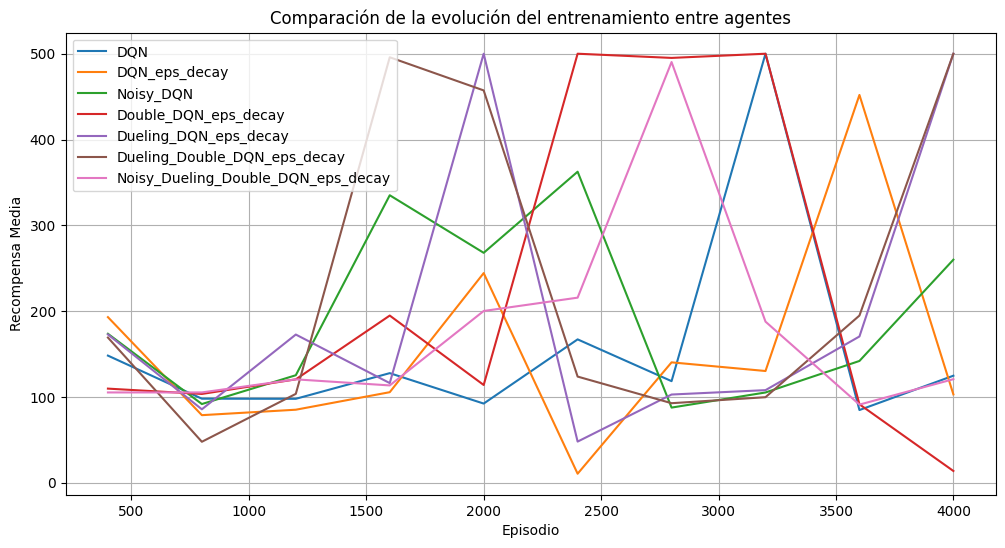

In [ ]:
all_agents = ["DQN", "DQN_eps_decay", "Noisy_DQN", "Double_DQN_eps_decay", "Dueling_DQN_eps_decay", "Dueling_Double_DQN_eps_decay", "Noisy_Dueling_Double_DQN_eps_decay"]
agents_rewards = {agent: {"episodes": [], "mean_rewards": []} for agent in all_agents}
episode_pattern = re.compile(r'test_results_episode_(\d+)')
i = 0

for agent in all_agents:

    stats_dir = f"{all_agents[i]}/stats/pkl/"

    pkl_files = sorted([f for f in os.listdir(stats_dir) if f.startswith("test_results_episode_") and f.endswith(".pkl")])
    pkl_files = sorted(pkl_files, key=lambda x: int(episode_pattern.search(x).group(1)))

    for file_name in pkl_files:

        file_path = os.path.join(stats_dir, file_name)
        episode_number = int(episode_pattern.search(file_name).group(1).replace("01","00"))
        with open(file_path, "rb") as f:
            data = pickle.load(f)
        
        rewards = np.array(data)
        mean_reward = np.mean(rewards)
        
        agents_rewards[agent]["episodes"].append(episode_number)
        agents_rewards[agent]["mean_rewards"].append(mean_reward)
    i += 1

plt.figure(figsize=(12, 6))

for agent, data in agents_rewards.items():
    plt.plot(data["episodes"], data["mean_rewards"], label=agent)

plt.xlabel("Episodio")
plt.ylabel("Recompensa Media")
plt.title("Comparación de la evolución del entrenamiento entre agentes")
plt.legend()
plt.grid()
plt.show()